In [1]:
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression  

Getting the data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


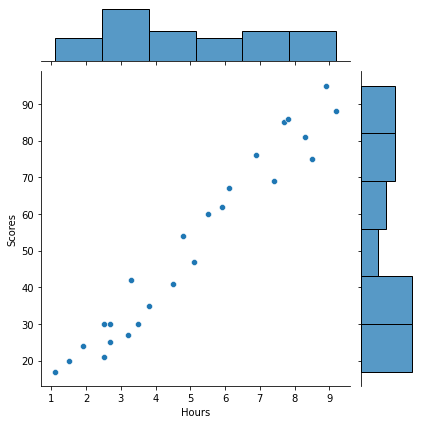

In [4]:
sns.jointplot(x='Hours', y='Scores', data = df)

The two variables seem to have a linear relation

Splitting the dependent and independent variables.

In [5]:
x = df.iloc[:, :-1].values  #hours
y = df.iloc[:, 1].values    #scores

Splitting the data into training and testing data

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=88)

Defining the model

In [7]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train)
print("Training complete.")

Training complete.


Predicting trained values

In [8]:
y_pred = model.predict(x_test) # Predicting the scores

Comparing the predicted values and our test dataset

In [9]:
op = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
op

,Actual,Predicted
0,54,49.944256
1,42,34.479722
2,17,11.798405
3,62,61.284914
4,75,88.090107
5,35,39.634566
6,88,95.306890
7,81,86.028169
8,25,28.293908
9,60,57.161039


Now coming to the main task where we are supposed to predict score of a student studying for 9.5 hours

In [10]:
def score(hours, coef =model.coef_, bias = model.intercept_):
    return coef*hours + bias

In [11]:
#For studying 9.5 hours our predicted score is
score(9.5)

array([98.39979637])

Calculating the error in our readings

In [12]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.096023530742687
